<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prep" data-toc-modified-id="Prep-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prep</a></span></li><li><span><a href="#Housing-price-distribution" data-toc-modified-id="Housing-price-distribution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Housing price distribution</a></span></li><li><span><a href="#Numerical-Data-Distribution" data-toc-modified-id="Numerical-Data-Distribution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Numerical Data Distribution</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Correlation</a></span></li><li><span><a href="#Feature-to-feature-relationship" data-toc-modified-id="Feature-to-feature-relationship-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature to feature relationship</a></span></li><li><span><a href="#Q--&gt;-Q-(Quantitative-to-Quantitative-relationship)" data-toc-modified-id="Q-->-Q-(Quantitative-to-Quantitative-relationship)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Q -&gt; Q (Quantitative to Quantitative relationship)</a></span></li><li><span><a href="#C--&gt;-Q-(Categorical-to-Quantitative-relationship)" data-toc-modified-id="C-->-Q-(Categorical-to-Quantitative-relationship)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>C -&gt; Q (Categorical to Quantitative relationship)</a></span></li></ul></div>

__File Info:__

Date: 20181023

Author: Stephanie Langeland 

File Name: 04_EDA_tutorial.ipynb

Version: 01

Previous Version/File: None

Dependencies: Data dictionary: ".\data_info\data_description.txt"

Purpose: Detailed exploratory data analysis with Python

Input File(s): train.csv

Output File(s): None

Required by: 
 - A beginner's guide to Python.
 - Tutorial: https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python/notebook

Status: Complete

Machine: Dell Latitude - Windows 10

Python Version: Python 3

# Prep

In [1]:
## Import packages:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import operator ## to use Standard operators as functions

In [2]:
# Comment this if the data visualizsations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [3]:
## Import training data:
df = pd.read_csv("C:/Users/stephanie.langeland/OneDrive - Slalom/bit_bucket/a_beginners_guide_to_python/input_output_files/train.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Let's just remove Id and the features with 30% or more NaN values:

In [5]:
df2 = df[ ## create a copy of df
    [
        column for column in df if df[
            column
        ].count() / len(df) >= 0.3
    ]
] ## identify columns in df that have >= 30% NaN values

del df2['Id'] ## delete this column

print(
    "List of dropped columns:",
    end = " "
) 

for c in df.columns:
    if c not in df2.columns:
        print(
            c,
            end = ", "
        )
print("\n") ## list the previously identified columns

df = df2 ## overwrite df as df2

List of dropped columns: Id, Alley, PoolQC, Fence, MiscFeature, 



# Housing price distribution

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\stephanie.langeland\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


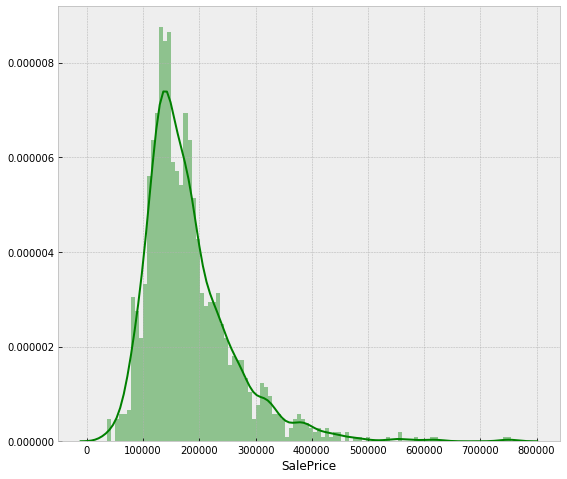

In [6]:
print(
    df["SalePrice"].describe()
)

plt.figure(
    figsize = (9, 8)
)

sns.distplot(
    df["SalePrice"],
    color = "g",
    bins = 100,
    hist_kws = {"alpha": 0.4}
)

# Numerical Data Distribution

For this part lets look at the distribution of all of the features by plotting them.  

To do so lets first list all the types of our data from our data set and take only the numerical ones:

In [7]:
list(
    set(
        df.dtypes.tolist()
    )
)

[dtype('O'), dtype('int64'), dtype('float64')]

In [8]:
df_num = df.select_dtypes(include = ["float64", "int64"])

df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Plot all numerical features' distributions:

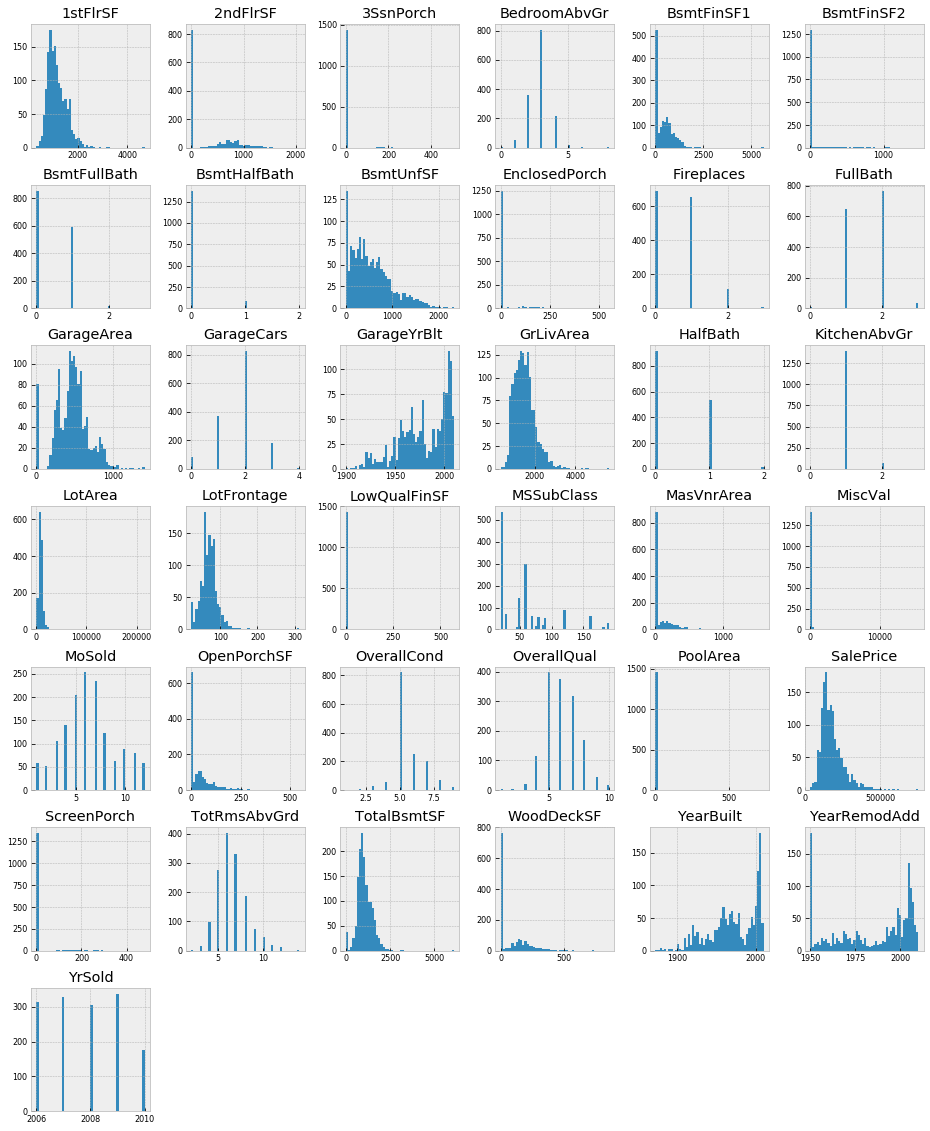

In [9]:
df_num.hist(
    figsize = (16, 20),
    bins = 50,
    xlabelsize = 8,
    ylabelsize = 8
); ## use the ";" to avoid verbose matplotlib information displayed 

# Correlation

Now we'll try to find which features are strongly correlated with `SalePrice`. We'll store them in a var called `golden_features_list`. We'll reuse our `df_num` data set to do so.

In [10]:
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [11]:
df_num_corr = df_num.corr()["SalePrice"][:-1] ## correlations of each variable with SalePrice (which is the last column)

golden_features_list = df_num_corr[
    abs(
        df_num_corr
    ) > 0.5 ## identify which variables have a correlation of more than 0.5 with SalePrice
].sort_values(
    ascending = False ## sort them in descending order
)

print(
    "There are {} strongly correlated values with SalePrice:\n{}".format(
        len(
            golden_features_list
        ), ## insert this length in the {} after "There are" above
        golden_features_list ## display this object 
    )
)

There are 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


Explore the affect of outliers on the above correlations:

 - Plot the numerical features - which variables have very few or explainable outliers?

 - Remove the outliers from these features - which variables still have  strong correlations with SalePrice without outliers?

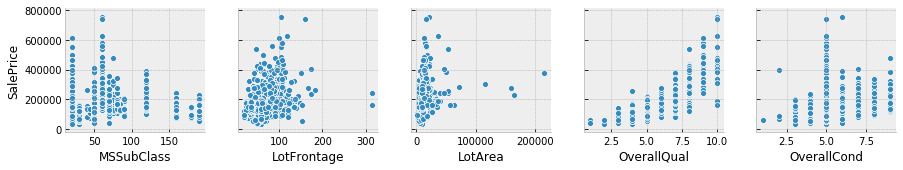

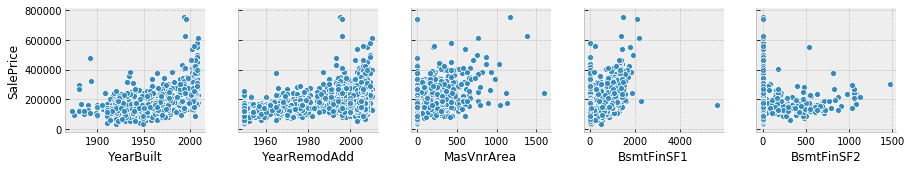

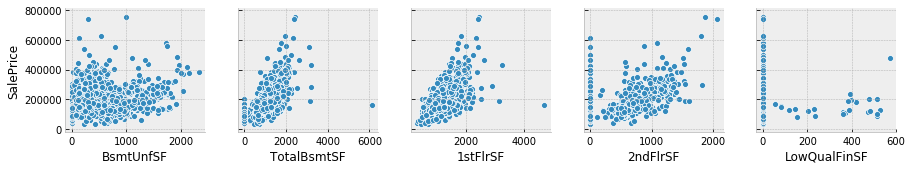

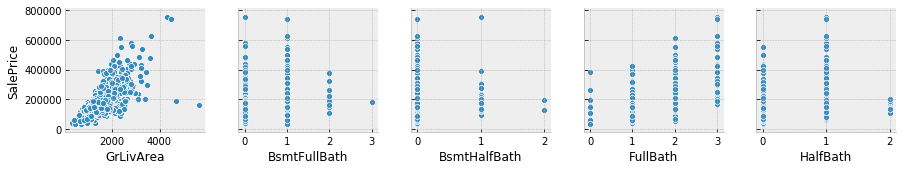

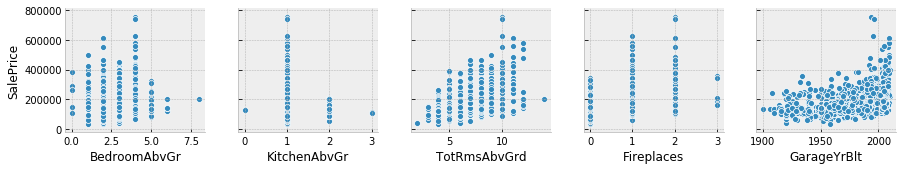

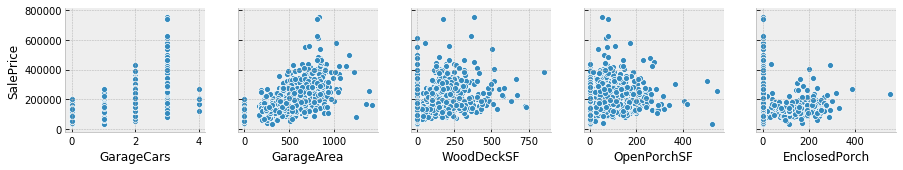

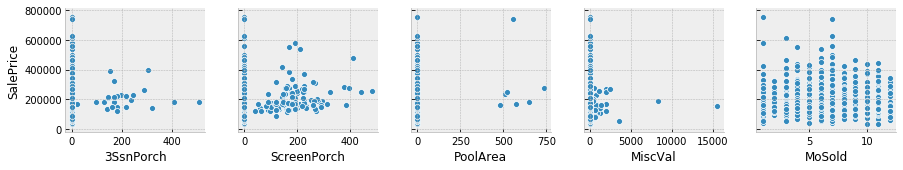

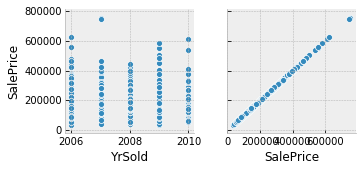

In [12]:
for i in range(
    0, ## start
    len(df_num.columns), ## stop
    5 ## step
):
    sns.pairplot(
        data = df_num,
        x_vars = df_num.columns[i:i + 5], ## step by 5
        y_vars = ["SalePrice"]
    )
    

    We see many points at x = 0 in various graphs, which denotes the absence of 
    that feature in a home, e.g. fireplaces, pool area, etc.  Remove these 0
    values and redo the correlation values:

In [13]:
individual_features_df = [] ## create an empty list 

for i in range(
    0, ## start
    len(df_num.columns) - 1 ## stop; all columns except SalePrice which is the last column
):
    tmpDf = df_num[
        [
            df_num.columns[i],
            "SalePrice"
        ]
    ] ## for all columns in df_num except SalePrice
    
    tmpDf = tmpDf[
        tmpDf[
            df_num.columns[i]
        ] != 0
    ] ## columns in tmpDf that don't equal 0
    
    individual_features_df.append(tmpDf)
    

all_correlations = {
    feature.columns[0]: feature.corr()["SalePrice"][0] for feature in individual_features_df
} ## each variable's correlation with SalePrice


all_correlations = sorted(
    all_correlations.items(), ## items() method returns a view obj that displays a list of dictionary's (key, value) tuple pairs
    key = operator.itemgetter(1) ##  operator.itemgetter(1): A function that grabs the nth (here is 1) item from a list-like obj
) 


for (key, value) in all_correlations:
    print(
        "{:>15}: {:>15}".format(
            key, ## corresponds to key =  in the revious function?
            value ## value that needs to be formatted
        )
    )

   KitchenAbvGr: -0.13920069217785566
       HalfBath: -0.08439171127179887
     MSSubClass: -0.08428413512659523
    OverallCond: -0.0778558940486776
         YrSold: -0.028922585168730426
   BsmtHalfBath: -0.028834567185481712
       PoolArea: -0.014091521506356928
   BsmtFullBath: 0.011439163340408634
         MoSold: 0.04643224522381936
      3SsnPorch: 0.06393243256889079
    OpenPorchSF: 0.08645298857147708
        MiscVal: 0.08896338917298924
     Fireplaces: 0.1216605842136395
      BsmtUnfSF: 0.16926100049514192
   BedroomAbvGr: 0.18093669310849045
     WoodDeckSF: 0.19370601237520677
     BsmtFinSF2: 0.19895609430836586
  EnclosedPorch: 0.2412788363011751
    ScreenPorch: 0.25543007954878405
        LotArea: 0.2638433538714063
   LowQualFinSF: 0.3000750165550133
    LotFrontage: 0.35179909657067854
     MasVnrArea: 0.4340902197568926
     BsmtFinSF1: 0.4716904265235731
    GarageYrBlt: 0.48636167748786213
   YearRemodAdd: 0.5071009671113867
      YearBuilt: 0.5228973328794967

Now our golden_features_list var looks like this:

In [14]:
golden_features_list = [
    key for key,
    value in all_correlations if abs(value) >= 0.5
]

print(
    "There are {} strongly correlated values with SalePrice:\n{}".format(
        len(golden_features_list),
        golden_features_list
    )
)

There are 11 strongly correlated values with SalePrice:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


Therefore, there are 11 features that are strongly correlated with SalePrice.

# Feature to feature relationship

Rather than plotting all of the numerical features using seasborn (which is very time consuming and difficult to interpret), explore whether some variables have relationships with each other:

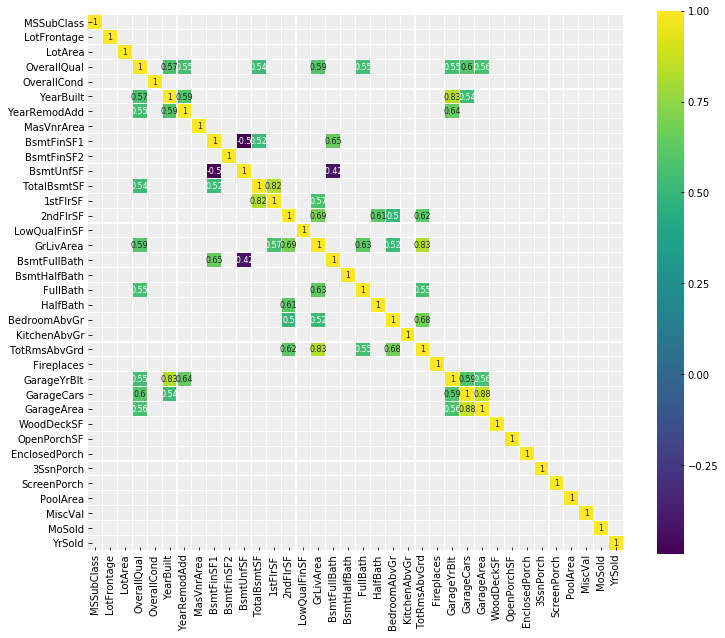

In [15]:
corr  = df_num.drop("SalePrice", axis = 1).corr() ## drop SalePrice bc we already explored this above

plt.figure(figsize = (12, 10))

sns.heatmap(
    corr[
        (corr >= 0.5) | (corr <= -0.4) ## only plot these correlations
    ],
    cmap = "viridis", ## color list 
    vmax = 1.0, ## value to anchor color map
    linewidths = 0.1, 
    annot = True, ## If True, write the data value in each cell
    annot_kws = {"size": 8}, ## value mapping
    square = True ## If True, set the Axes aspect to “equal” so each cell will be square-shaped.
);

# Q -> Q (Quantitative to Quantitative relationship)

Examine the quantitative features of our dataframe and how they relate to the `SalePrice`.

Separate the categorical from quantitative features (refer to the following data dictionary: "C:\Users\stephanie.langeland\OneDrive - Slalom\Misc\Personal\Coding Reference Files\Python\a_beginners_guide_to_python\data_info\data_description.txt"):

In [16]:
quantitative_features_list = [
    'LotFrontage', 
    'LotArea', 
    'MasVnrArea', 
    'BsmtFinSF1', 
    'BsmtFinSF2', 
    'TotalBsmtSF', 
    '1stFlrSF',
    '2ndFlrSF', 
    'LowQualFinSF', 
    'GrLivArea', 
    'BsmtFullBath', 
    'BsmtHalfBath', 
    'FullBath', 
    'HalfBath',
    'BedroomAbvGr', 
    'KitchenAbvGr', 
    'TotRmsAbvGrd', 
    'Fireplaces', 
    'GarageCars', 
    'GarageArea', 
    'WoodDeckSF', 
    'OpenPorchSF', 
    'EnclosedPorch', 
    '3SsnPorch', 
    'ScreenPorch', 
    'PoolArea', 
    'MiscVal', 
    'SalePrice'
]


df_quantitative_values = df[quantitative_features_list] ## subset this list of columns

df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


Look at the strongly correlated features:

In [17]:
features_to_analyse = [
    x for x in quantitative_features_list if x in golden_features_list ## extract variables in both lists
]


features_to_analyse.append("SalePrice") ## add this variable name to the list we created

features_to_analyse

['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

Distribution of `features_to_analyse`:

C:\Users\stephanie.langeland\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


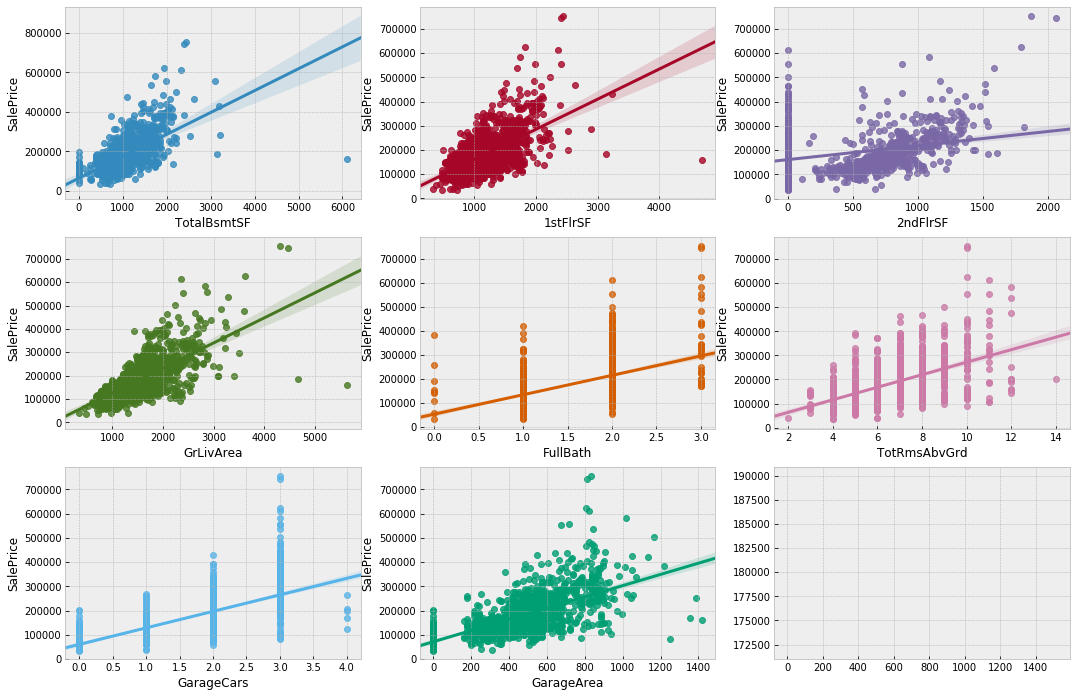

In [18]:
fig, ax = plt.subplots(
    round(
        len(features_to_analyse) / 3
    ),
    3,
    figsize = (18,12)
) ## this creates the blank plots with just the grey background 


for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(
            x = features_to_analyse[i],
            y = "SalePrice",
            data = df[features_to_analyse],
            ax = ax
        ) ## for each variable in features_to_analyse, plot it against SalePrice

# C -> Q (Categorical to Quantitative relationship)

Subset the categorical variables --> just remove quantitative_features_list and irrelevant non-numerical features from our entire dataframe:

In [19]:
## remove columns from df that are included in quantitative_features_list:
categorical_features = [
    a for a in quantitative_features_list[:-1] + ## need to keep SalePrice which is the last column
    df.columns.tolist() if ( ## tolist() converts the array into a list.
        a not in quantitative_features_list[:-1] ## if columns in df are not in quantitative_features_list
    ) or (
        a not in df.columns.tolist()  ## or in df
    )
] 


df_categ = df[categorical_features]

df_categ.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal,250000


In [20]:
## remove non-numerical features:
df_not_num = df_categ.select_dtypes(include = ['O'])


print(
    "There are {} non-numerical features:\n{}".format(
        len(df_not_num.columns),
        df_not_num.columns.tolist()
    )
)

There are 39 non-numerical features:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


Plot some categorical features:

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

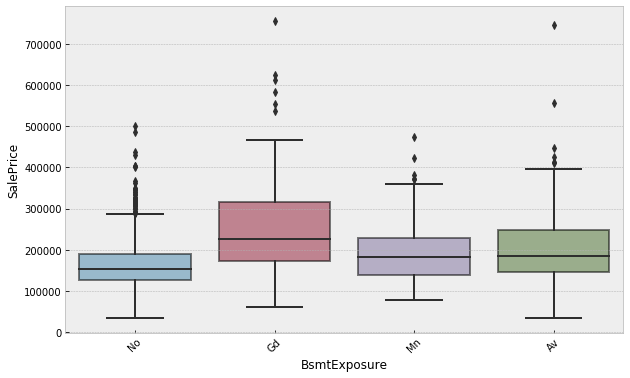

In [21]:
plt.figure(figsize = (10, 6))

ax = sns.boxplot(
    x = "BsmtExposure",
    y = "SalePrice",
    data = df_categ
)


plt.setp(
    ax.artists, 
    alpha = 0.5,
    linewidth = 2, 
    edgecolor = "k"
)


plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

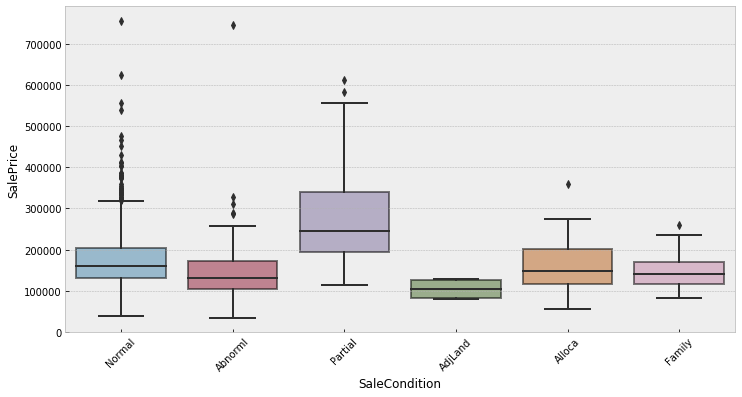

In [22]:
plt.figure(figsize = (12, 6 ))

ax = sns.boxplot(
    x = "SaleCondition",
    y = "SalePrice",
    data = df_categ
)

plt.setp(
    ax.artists,
    alpha = 0.5,
    linewidth = 2,
    edgecolor = "k"
)

plt.xticks(rotation = 45)

Distributions of Categorical Features:

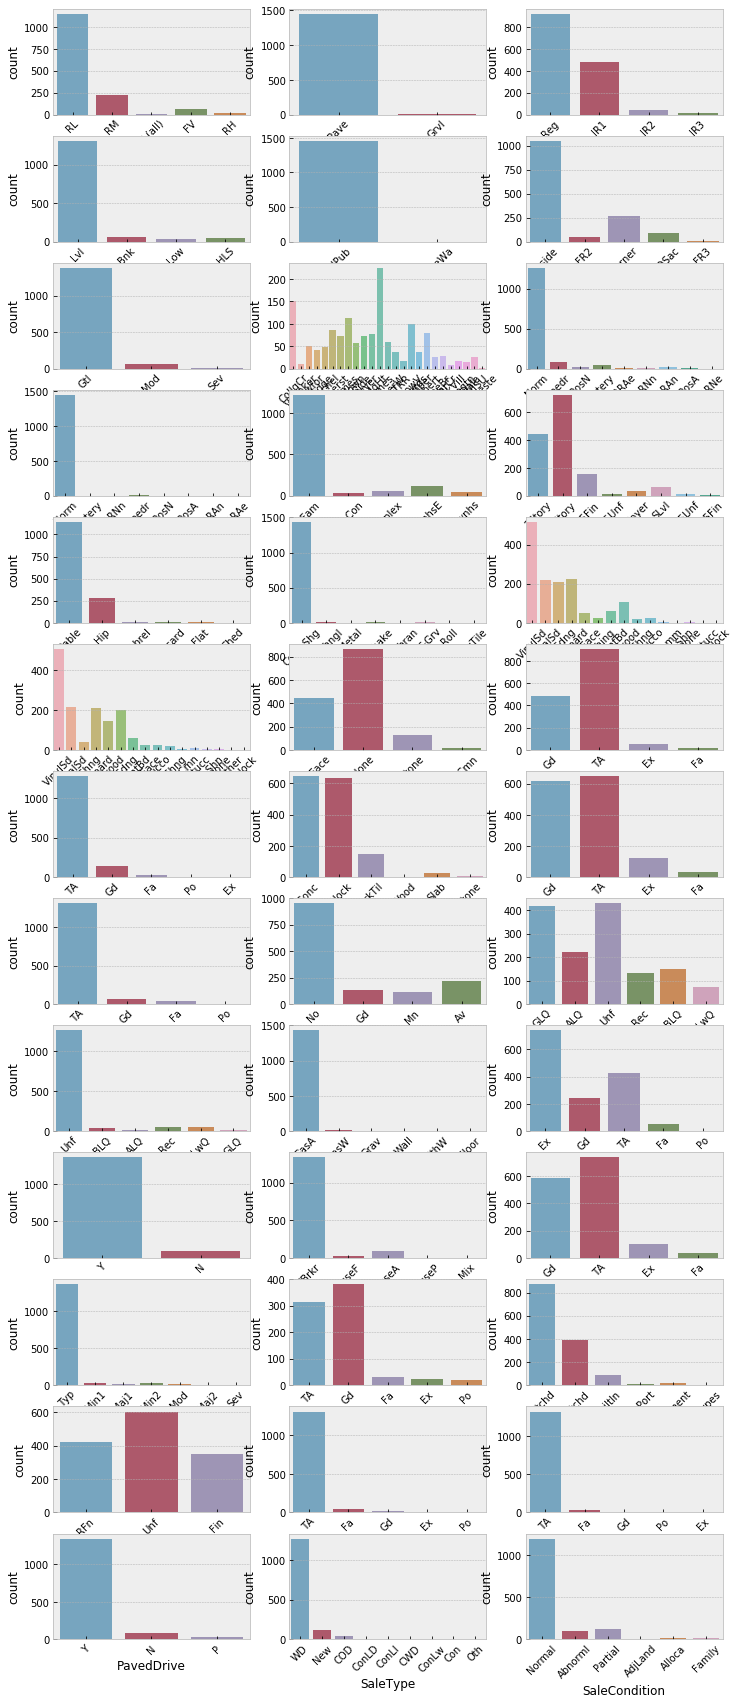

In [23]:
fig, axes = plt.subplots(
    round(
        len(df_not_num.columns) / 3
    ), 
    3,
    figsize = (12, 30)
)


for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(
            ax.xaxis.get_majorticklabels(),
            rotation = 45
        )
        
        sns.countplot(
            x = df_not_num.columns[i],
            alpha = 0.7,
            data = df_not_num,
            ax = ax
        )